In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('raw_data.csv')

# 1. Checking the data imported

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# 2. Checking the information of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset consists of 33 columns and 569 rows. Looking at **the dtype of columns**, there is **1 column** with *categorical value* (which is **"diagnosis"**) and **other columns** have *continuous value*. I will categorize them later to run suitable models. 

Now I will drop some irrelavant columns which are **"id" and "Unnamed"**.

In [6]:
data = data.drop(['Unnamed: 32'], axis =1)
data = data.drop(['id'], axis =1)

In [7]:
data.shape

(569, 31)

# 3. Check duplicated data

In [8]:
data.duplicated().sum()

0

There is **no duplicated data**. I do not have to drop any.

# 4. Separate categorical value and continuous value

In [9]:
cate_val = []
cont_val = []

for col in data.columns:
    if data[col].dtype == 'object':
        cate_val.append(col)
    else:
        cont_val.append(col)

In [10]:
cate_val

['diagnosis']

In [11]:
cont_val

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Since the **"diagnosis"** column is the outcome, I will move it to the rightmost for the better look and quantify them value into 0 and 1.

In [12]:
column_to_move = data.pop('diagnosis')
data.insert(30, 'diagnosis', column_to_move)

In [13]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [14]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

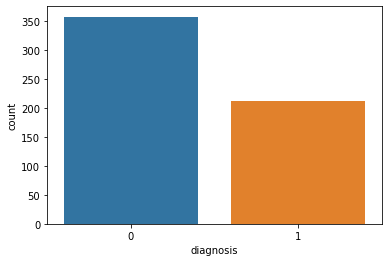

In [16]:
sns.countplot(x= data['diagnosis'])

As we can see, the number of people who do not have the breast cancer is **about 175% larger** than the number of people who do have the disease. This means **any model with any variables** giving the result "0" will already have **more than 63%** of giving the correct outcome. Therefore, I will handle the imbalance by using **overfitting**

# 5. Handle imbalanced data with SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X = data.drop('diagnosis', axis =1)
y = data['diagnosis']

In [19]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

# 6. Check the overall statistics of the dataset 

In [21]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


I realize the range of value in the dataset columns **varies significantly**. In this case, **normalization** is an appropriate scaling method as it scales the variables between 0 and 1, which helps in handling variables with different ranges.

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
data[cont_val] = scaler.fit_transform(data[cont_val])

In [24]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1


**Now the data is ready for model training**

# 7. Splitting the dataset into training set and testing set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size =0.20,random_state = 42)

I usually set the **test size = 0.20** which means 20% and the **random_state = 42** for **identical outcome** if someone uses my code for praticing 

# 8. Logistics Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
y_pred_lr = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred_lr)

0.965034965034965

# 9. SVC

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(X_train, y_train)

SVC()

In [35]:
y_pred_svm = svm.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred_svm)

0.8811188811188811

# 10. KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier 

In [38]:
kn = KNeighborsClassifier() 

In [39]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_kn = kn.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred_kn)

0.9090909090909091

The algorithm use a default number of neighbors = 5. Therefore, I will find the number of neighbors **with highest accuracy score**

In [42]:
score = []

for k in range(1,40):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train, y_train)
    y_pred_kn = kn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred_kn))

In [43]:
score

[0.9440559440559441,
 0.9300699300699301,
 0.9230769230769231,
 0.9020979020979021,
 0.9090909090909091,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9090909090909091,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.9020979020979021,
 0.8951048951048951,
 0.9020979020979021,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951,
 0.8951048951048951]

**k = 1 is the best option here**

In [44]:
kn = KNeighborsClassifier(n_neighbors = 1)
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)
accuracy_score(y_test, y_pred_kn)

0.9440559440559441

# 11. Non-linear ML Algorithms

For non-linear ML algorithms, preprocessing is not necessary. You can create a new dataframe if you want. Here is the code

In [45]:
data1 = pd.read_csv('raw_data.csv')
data1 = data1.drop(['Unnamed: 32'], axis =1)
data1 = data1.drop(['id'], axis =1)
column_to_move = data1.pop('diagnosis')
data1.insert(30, 'diagnosis', column_to_move)
data1['diagnosis'] = data1['diagnosis'].map({'M': 1, 'B':0})
X1 = data1.drop('diagnosis', axis =1)
y1 = data1['diagnosis']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size =0.20,random_state = 42)

# 12. Decision tree classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(X1_test)

In [50]:
accuracy_score(y1_test, y_pred_dt)

0.9473684210526315

# 13. Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X1_train, y1_train)

RandomForestClassifier()

In [54]:
y_pred_rf = rf.predict(X1_test)

In [55]:
accuracy_score(y1_test, y_pred_rf)

0.9649122807017544

# 14. Gradient boosting classifier 

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gb = GradientBoostingClassifier()

In [58]:
gb.fit(X1_train, y1_train)

GradientBoostingClassifier()

In [59]:
y_pred_gb = gb.predict(X1_test)

In [60]:
accuracy_score(y1_test, y_pred_gb)

0.956140350877193

# 15. Compare Models

In [61]:
model_compare = pd.DataFrame({'Model':['LR','SVM','KN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test, y_pred_lr),
                                accuracy_score(y_test, y_pred_svm),
                                accuracy_score(y_test, y_pred_kn),
                                accuracy_score(y1_test, y_pred_dt),
                                accuracy_score(y1_test, y_pred_rf),
                                accuracy_score(y1_test, y_pred_gb)]})

In [62]:
model_compare

,Model,ACC
0,LR,0.965035
1,SVM,0.881119
2,KN,0.944056
3,DT,0.947368
4,RF,0.964912
5,GB,0.956140


Now I know **Random Forest Classifier** is the best model to apply. Next step, I will train the entire dataset with the Random Forest model

In [63]:
X = data1.drop('diagnosis', axis=1)
y = data1['diagnosis']

In [64]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

**Let's create random input**

In [73]:
ran_input = pd.DataFrame({
    'radius_mean':20,
    'texture_mean':15,
    'perimeter_mean':100,
    'area_mean':1000,
    'smoothness_mean':0.1,
    'compactness_mean':0.2,
    'concavity_mean':0.2,
    'concave points_mean':0.1,
    'symmetry_mean':0.2,
    'fractal_dimension_mean':0.06,
    'radius_se':0.8,
    'texture_se':1,
    'perimeter_se':6,
    'area_se':90,
    'smoothness_se':0.007,
    'compactness_se':0.07,
    'concavity_se':0.04,
    'concave points_se':0.016,
    'symmetry_se':0.02,
    'fractal_dimension_se':0.006,
    'radius_worst':23,
    'texture_worst':20,
    'perimeter_worst':150,
    'area_worst':1700,
    'smoothness_worst':0.15,
    'compactness_worst':0.5,
    'concavity_worst':0.5,
    'concave points_worst':0.20,
    'symmetry_worst':0.4,
    'fractal_dimension_worst':0.12,
},index=[0])

In [74]:
scaled_ran_input = scaler.transform(ran_input)

In [75]:
scaled_ran_input

array([[0.61616735, 0.17889753, 0.38843204, 0.36330859, 0.42764286,
        0.55401509, 0.46860356, 0.49701789, 0.47474747, 0.21145746,
        0.24932102, 0.14139851, 0.2470433 , 0.15539468, 0.17972601,
        0.50881726, 0.1010101 , 0.30308771, 0.17051275, 0.17637467,
        0.53610815, 0.21268657, 0.49599084, 0.3722965 , 0.52057056,
        0.45862561, 0.39936102, 0.68728522, 0.47999212, 0.42607897]])

In [76]:
p = rf.predict(scaled_ran_input)
if p[0] ==1:
    print('Malignant Cancer')
else:
    print('Benign Cancer')

Benign Cancer


# 16. GUI

In [69]:
from tkinter import *

In [82]:
def show_entry():
    p = list(map(float, [eval("e" + str(i) + ".get()") for i in range(1, 31)]))
    p = np.array(p).reshape(1, -1)
    scaled_p = scaler.transform(p)
    
    result = rf.predict(scaled_p)
    Label(master, text = 'Cancer Identification').grid(row=31)
    if result == 0:
        Label(master, text='Benign Cancer').grid(row=32)
    elif result == 1:
        Label(master, text='Malignant Cancer').grid(row=32)
        
master = Tk()
master.title('Cancer Identification')
label = Label(master, text = 'Cancer Identification', bg ='black', fg='white').grid(row=0, columnspan = 2)

X = data1.drop('diagnosis', axis =1)
for i, name in enumerate(X.columns):
    Label(master, text = name).grid(row=i+1)

for i in range(1, 31):
    exec(f'e{i} = Entry(master)')
    
for i in range(1, 31):
    exec(f'e{i}.grid(row={i}, column=1)')

Button(master, text='Identify', command=show_entry).grid()

mainloop()